## Classic ESN (NO IP)

In [1]:
from IPReservoir import IPReservoir
from ESN import Reservoir, EchoStateNetwork
from DATA import NARMA10

narma = NARMA10(True, [60,0,40])

X_TR, Y_TR = narma.TR()
X_VAL, Y_VAL = narma.VAL()
X_TS, Y_TS = narma.TS()


In [2]:
network = EchoStateNetwork(Reservoir(1, 1000, ro_rescale=0.85, sparsity=0.7))

In [3]:
network.train(X_TR, Y_TR, 0.1, transient=100)

torch.Size([5900])


[1.4887244732360776, 0.005722167255668319, 0.31203491163152475]


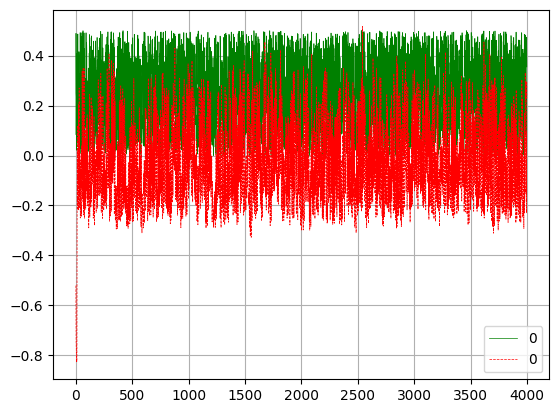

In [4]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

In [5]:
network.MC(X_TR, 200)

1.4290355014891363

## ESN IP - Normal Distribution

In [6]:
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,1000, sparsity=0.8, ro_rescale=0.2)

ip_mask = IPMask.normalMask(1000)

ip_reservoir.set_IP_mask(ip_mask)

In [7]:
ip_reservoir.pre_train_online(X_TR, 0.00005, epochs=5, transient=100, verbose=True)

 - Epoch: 1
 - Epoch: 2
 - Epoch: 3
 - Epoch: 4
 - Epoch: 5


In [8]:
ip_reservoir.predict(X_TR, False, True)

tensor([[-0.4393, -0.4037, -0.1890,  ...,  0.3050, -0.2370, -0.3152],
        [-0.1828, -0.5446, -0.0950,  ...,  0.3854, -0.4377, -0.0893],
        [-0.2876, -0.5317, -0.2241,  ...,  0.3893, -0.4902, -0.0722],
        ...,
        [ 0.4942,  0.4287,  0.0976,  ..., -0.2511,  0.2134,  0.1927],
        [ 0.3456,  0.3281,  0.0521,  ..., -0.1646,  0.1663,  0.0916],
        [ 0.1474,  0.1094, -0.0038,  ..., -0.0230,  0.0427, -0.0088]])

In [9]:
ip_reservoir.sample_targets(X_TR.shape[0])

In [10]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (0.5164738893508911)  ACTUAL_STD == (0.35369256138801575)][ TARGET_MEAN == (0.017483806237578392) TARGET_STD == (1.001927375793457)]
Unit - (2): [ ACTUAL_MEAN == (0.4291331470012665)  ACTUAL_STD == (0.27600017189979553)][ TARGET_MEAN == (0.00219902815297246) TARGET_STD == (0.9857836365699768)]
Unit - (3): [ ACTUAL_MEAN == (0.08893375843763351)  ACTUAL_STD == (0.12301301211118698)][ TARGET_MEAN == (0.0032369678374379873) TARGET_STD == (1.0081415176391602)]
Unit - (4): [ ACTUAL_MEAN == (-0.2053244560956955)  ACTUAL_STD == (0.17007383704185486)][ TARGET_MEAN == (-0.00013115027104504406) TARGET_STD == (1.000165343284607)]
Unit - (5): [ ACTUAL_MEAN == (-0.6227862238883972)  ACTUAL_STD == (0.3508797585964203)][ TARGET_MEAN == (0.010293946601450443) TARGET_STD == (0.9976486563682556)]
Unit - (6): [ ACTUAL_MEAN == (-0.6703221201896667)  ACTUAL_STD == (0.3639576733112335)][ TARGET_MEAN == (0.001698788721114397) TARGET_STD == (0.9841988682746887)]
Unit - (7): [ ACTUA

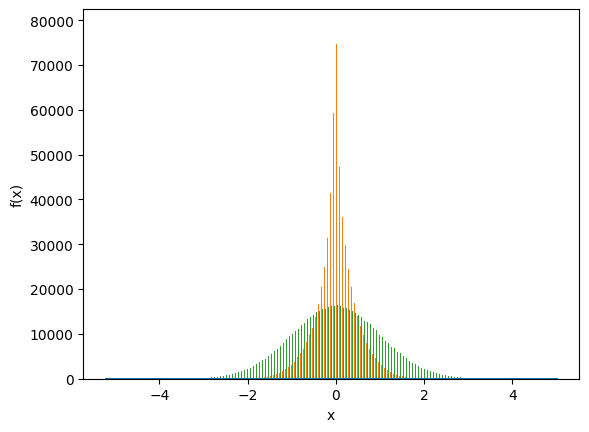

In [11]:
ip_reservoir.plot_overall_activation_distribution(X_TR)

In [13]:
from ESN import Reservoir, EchoStateNetwork

network = EchoStateNetwork(ip_reservoir)

In [14]:
network.train(X_TR, Y_TR, 0.25, transient=100)

No transient applied. Reservoir was already warmed up
torch.Size([6000])


[0.8495051111540614, 0.0032921315682409697, 0.16973937685974969]


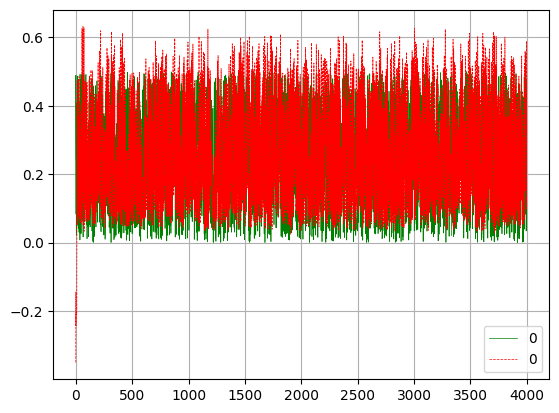

In [15]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

In [16]:
network.MC(X_TR, 200)

1.111462528385553

## Non linear ESN - Full Gaussian with opposite Means

In [17]:

from IPReservoir import IPReservoir
from DATA import NARMA10

narma = NARMA10(True, [60,0,40])

X_TR, Y_TR = narma.TR()
X_VAL, Y_VAL = narma.VAL()
X_TS, Y_TS = narma.TS()


In [18]:
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,1000, sparsity=0.8, ro_rescale=0.2)

ip_mask = IPMask.mixedBimodalMask(1000)

ip_reservoir.set_IP_mask(ip_mask)

In [19]:
ip_reservoir.pre_train_online(X_TR, 0.000001, epochs=5, transient=100, verbose=True)

KeyboardInterrupt: 

In [ ]:
ip_reservoir.predict(X_TR, False, True)

NameError: name 'ip_reservoir' is not defined

In [ ]:
ip_reservoir.sample_targets(X_TR.shape[0])

In [ ]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (0.1628963202238083)  ACTUAL_STD == (0.0762312114238739)][ TARGET_MEAN == (-0.9246029853820801) TARGET_STD == (0.5805229544639587)]
Unit - (2): [ ACTUAL_MEAN == (0.5624039769172668)  ACTUAL_STD == (0.17267130315303802)][ TARGET_MEAN == (0.9246684908866882) TARGET_STD == (0.5776181221008301)]
Unit - (3): [ ACTUAL_MEAN == (-0.29847943782806396)  ACTUAL_STD == (0.13042138516902924)][ TARGET_MEAN == (-0.9209399819374084) TARGET_STD == (0.5819172859191895)]
Unit - (4): [ ACTUAL_MEAN == (1.024990439414978)  ACTUAL_STD == (0.26195305585861206)][ TARGET_MEAN == (0.9201143383979797) TARGET_STD == (0.584532618522644)]
Unit - (5): [ ACTUAL_MEAN == (-0.016879944130778313)  ACTUAL_STD == (0.08373156934976578)][ TARGET_MEAN == (-0.9296277165412903) TARGET_STD == (0.5729201436042786)]
Unit - (6): [ ACTUAL_MEAN == (0.0155385322868824)  ACTUAL_STD == (0.03466805815696716)][ TARGET_MEAN == (0.90934818983078) TARGET_STD == (0.5823370814323425)]
Unit - (7): [ ACTUAL_MEAN == (0

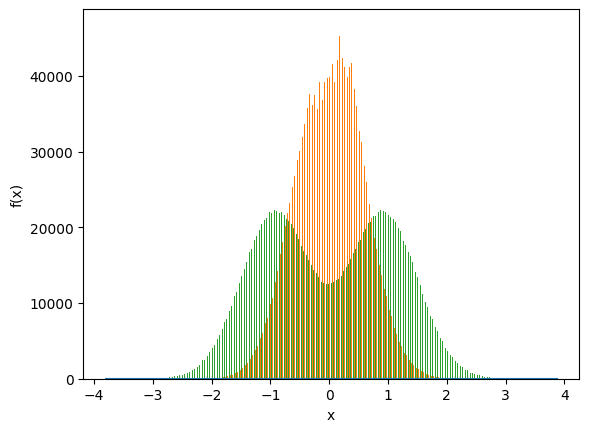

In [ ]:
ip_reservoir.plot_overall_activation_distribution(X_TR)

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [ ]:
from ESN import EchoStateNetwork

network = EchoStateNetwork(ip_reservoir)

In [ ]:
network.train(X_TR, Y_TR, 0.05, transient=100)

No transient applied. Reservoir was already warmed up
torch.Size([6000])


[2.5899472245765884, 0.004093302635796173, 0.21810143501424087]


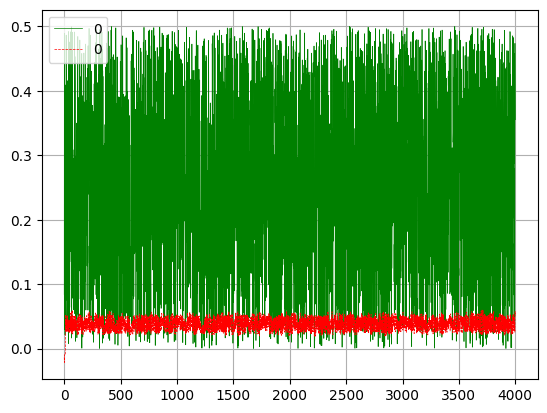

In [ ]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS, Y_TS, metric=NRMSE()),
    network.evaluate(X_TS, Y_TS, metric=MSE()),
    network.evaluate(X_TS, Y_TS, metric=ME(), plot=True)])

In [ ]:
network.MC(X_TR, 200)

1.255715744689022